In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

def numerical_lim(f,x,h):
    return (f(x + h) - f(x)) / h

# h = 0.1
# for i in range(6):
#     print(f"h: {h:.10f}, numerical limit: {numerical_lim(f,2,h):.10f}")
#     h *= 0.1

import torch

x = torch.arange(4.0, requires_grad=True)
print(x.grad)  # None
print(y := torch.dot(x, x))  # 0 + 1 + 4 + 9 = 14

None
tensor(14., grad_fn=<DotBackward0>)


In [3]:
torch.tensor([[1.,2.],[3.,4.]]).shape

torch.Size([2, 2])

In [4]:
# Elementwise
x = torch.tensor([1., 2., 3.])
y = torch.tensor([4., 5., 6.])
z = x * y  # Elementwise multiplication
print(x) 
print(y) 
print(z)

tensor([1., 2., 3.])
tensor([4., 5., 6.])
tensor([ 4., 10., 18.])


In [5]:
# Concat
a = torch.cat((x, y), dim=0)  # Concatenate along the first dimension
b = torch.tensor([[1., 2.], [3., 4.]])
c = b*3
d = torch.cat((b, c), dim=0)  # Concatenate along the first dimension
e = torch.cat((b, c), dim=1)  # Concatenate along the second dimension
for i in [a, b, c, d, e]:
    print(i)
a.sum(dim=0)

tensor([1., 2., 3., 4., 5., 6.])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 3.,  6.],
        [ 9., 12.]])
tensor([[ 1.,  2.],
        [ 3.,  4.],
        [ 3.,  6.],
        [ 9., 12.]])
tensor([[ 1.,  2.,  3.,  6.],
        [ 3.,  4.,  9., 12.]])


tensor(21.)

In [6]:
# Broadcasting

a = torch.arange(3).reshape((3,1))
b = torch.arange(2).reshape((1,2))
print(a)
print(b)
print(a + b)  # Broadcasting addition

tensor([[0],
        [1],
        [2]])
tensor([[0, 1]])
tensor([[0, 1],
        [1, 2],
        [2, 3]])


In [7]:
X = torch.arange(18).reshape((3,3,2))
print(X)
print(X[0:2])  

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])
tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]]])


In [8]:
# pytortch autograd
# if f(x) gives uc norm squared, then div f(x) = 2x

x = torch.arange(4.0, requires_grad=True)
print(x.grad)  # None
y = torch.dot(x,x)  # 0 + 1 + 4 + 9 = 14
y.backward()
print(x.grad)  # dy/dx = 2x
print(y)
print(x)

x.grad.zero_() # reset gradients to zero
y = x.sum() # defined another function which merely sums the elements of x
print(y)
y.backward()
print(x.grad)  # dy/dx = 1
print("--Gvining I")
x.grad.zero_() # reset gradients to zero
y = x**2
print(y)
y.backward(torch.tensor([1.0, 1.0, 1.0, 1.0]))  # specifying gradient argument
print(x.grad)  

c = torch.arange(3.0, requires_grad=True)
y = c*c 
y.backward(torch.tensor([1.0, 5.0, 0.0]))
c.grad


None
tensor([0., 2., 4., 6.])
tensor(14., grad_fn=<DotBackward0>)
tensor([0., 1., 2., 3.], requires_grad=True)
tensor(6., grad_fn=<SumBackward0>)
tensor([1., 1., 1., 1.])
--Gvining I
tensor([0., 1., 4., 9.], grad_fn=<PowBackward0>)
tensor([0., 2., 4., 6.])


tensor([ 0., 10.,  0.])

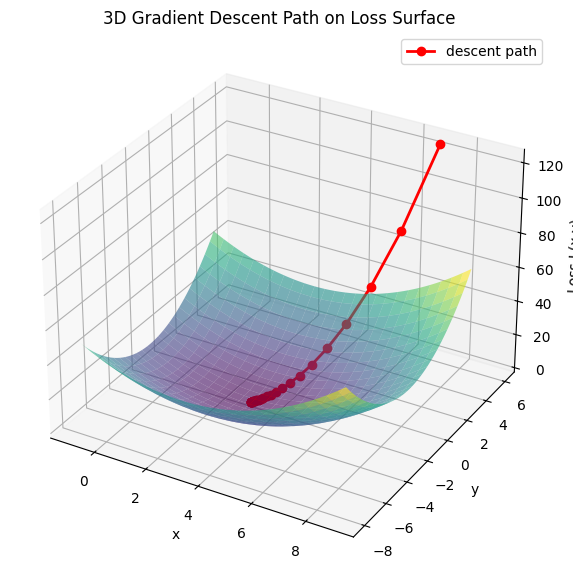

In [9]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# --- Define function ---
def loss_fn(xy):
    x, y = xy[0], xy[1]
    return (x - 3)**2 + (y + 2)**2

# --- Initialize ---
x = torch.tensor([8.0, 8.0], requires_grad=True)
eta = 0.1
history = []

# --- Gradient descent loop ---
for step in range(30):
    L = loss_fn(x)
    L.backward()

    with torch.no_grad():
        x -= eta * x.grad
        history.append([x[0].item(), x[1].item(), L.item()])
        x.grad.zero_()

# --- Convert path to numpy ---
history = np.array(history)

# --- Create surface grid for plotting ---
X = np.linspace(-1, 9, 100)
Y = np.linspace(-8, 4, 100)
X, Y = np.meshgrid(X, Y)
Z = (X - 3)**2 + (Y + 2)**2

# --- Plot 3D surface + path ---
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, rstride=4, cstride=4, linewidth=0)
ax.plot(history[:,0], history[:,1], history[:,2], 'ro-', label='descent path', linewidth=2)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('Loss L(x,y)')
ax.set_title('3D Gradient Descent Path on Loss Surface')
ax.legend()
plt.show()


In [19]:
from torch.utils import data 

def synthetic_data(w, b, num_examples):
    """Generate y = Xw + b + noise."""
    X = torch.normal(0,1,size=(num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, size=y.shape)
    return X, y.reshape((-1, 1))
# --- Parameters ---

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)
print(features.shape, labels.shape) 
data.TensorDataset
def load_array(data_arrays, batch_size, is_train=True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset, batch_size, shuffle=is_train)

batch_size = 50
data_iter = load_array((features, labels), batch_size)


torch.Size([1000, 2]) torch.Size([1000, 1])


In [ ]:
from torch import nn

net = nn.Sequential(nn.Linear(2,1))
net[0].weight, net[0].bias

loss_fn = nn.MSELoss()
trainer = torch.optim.SGD(net.parameters(), lr=0.03)

num_epochs = 60
for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss_fn(net(X), y)
        trainer.zero_grad()
        l.backward()
        trainer.step()
    l = loss_fn(net(features), labels)
    print(f'epoch {epoch + 1}, loss {l:f}')
X, y = next(iter(data_iter))
print(X.shape, y.shape)



epoch 1, loss 2.802933
epoch 2, loss 0.280127
epoch 3, loss 0.028205
epoch 4, loss 0.002907
epoch 5, loss 0.000380
epoch 6, loss 0.000127
epoch 7, loss 0.000102
epoch 8, loss 0.000100
epoch 9, loss 0.000099
epoch 10, loss 0.000099
epoch 11, loss 0.000099
epoch 12, loss 0.000099
epoch 13, loss 0.000099
epoch 14, loss 0.000099
epoch 15, loss 0.000099
epoch 16, loss 0.000099
epoch 17, loss 0.000099
epoch 18, loss 0.000099
epoch 19, loss 0.000099
epoch 20, loss 0.000099
epoch 21, loss 0.000099
epoch 22, loss 0.000099
epoch 23, loss 0.000099
epoch 24, loss 0.000099
epoch 25, loss 0.000099
epoch 26, loss 0.000099
epoch 27, loss 0.000099
epoch 28, loss 0.000099
epoch 29, loss 0.000099
epoch 30, loss 0.000099
epoch 31, loss 0.000099
epoch 32, loss 0.000099
epoch 33, loss 0.000099
epoch 34, loss 0.000099
epoch 35, loss 0.000099
epoch 36, loss 0.000099
epoch 37, loss 0.000099
epoch 38, loss 0.000099
epoch 39, loss 0.000099
epoch 40, loss 0.000099
epoch 41, loss 0.000099
epoch 42, loss 0.000099
e

In [33]:
print(net(torch.tensor([[0.5,0.3]])))
torch.nn.MSELoss()(torch.tensor([[[4.0],[2.0]],[[4.0],[2.0]]]), torch.tensor([[[2.0],[6]],[[2.0],[6]]])).shape

tensor([[4.1800]], grad_fn=<AddmmBackward0>)


torch.Size([])